#                  Phase 3(SQL OPERATION)

In [87]:

import csv
import pandas as pd
import pymysql
import warnings
warnings.filterwarnings('ignore')

In [3]:

conn= pymysql.connect(
    host='localhost',
    user='root',
    password='root',
    db="crime_database"
)

cur=conn.cursor()# creating cursor object

In [39]:

cur.execute("CREATE TABLE crime_against_women_new1(state_UT TEXT,DISTRICT TEXT,Year TEXT,Rape INT,Kidnapping INT,Dowry_Deaths INT,Assault INT,Insult  INT,Cruelty_by_Husband  INT,Importation_of_Girls INT) ")
conn.commit()#commit changes 

# 3.1 Creating a table with the entries from 42_District_wise_crimes_committed_against_women_2001_2012.csv.


In [ ]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv','r') as file :
    #r here is read as
    csv_data=csv.reader(file)
    no_records=0
    for row in csv_data:
        try:
            cur.execute('INSERT INTO crime_against_women_new1 VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)',row)    
            conn.commit()
        except pymysql.Error as e:
            print(f"Error inserting row:{e}")



print("Data inserted successfully!")




In [41]:
# executed query to retrieve all the records from  the table crime_against_women_new1
result=cur.execute("select * from  crime_against_women_new1")

In [45]:
result_set=cur.fetchall()# fetching all the records  

In [48]:
# displaying all the records from the table
count=0
for row in result_set:
    print(row)
    count+=1


('ANDHRA PRADESH', 'ADILABAD', '2001', 50, 30, 16, 149, 34, 175, 0)
('ANDHRA PRADESH', 'ANANTAPUR', '2001', 23, 30, 7, 118, 24, 154, 0)
('ANDHRA PRADESH', 'CHITTOOR', '2001', 27, 34, 14, 112, 83, 186, 0)
('ANDHRA PRADESH', 'CUDDAPAH', '2001', 20, 20, 17, 126, 38, 57, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', '2001', 23, 26, 12, 109, 58, 247, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', '2001', 0, 0, 0, 1, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', '2001', 54, 51, 7, 139, 129, 378, 0)
('ANDHRA PRADESH', 'HYDERABAD CITY', '2001', 37, 39, 24, 118, 27, 746, 0)
('ANDHRA PRADESH', 'KARIMNAGAR', '2001', 56, 49, 62, 414, 81, 224, 0)
('ANDHRA PRADESH', 'KHAMMAM', '2001', 47, 30, 17, 180, 336, 172, 0)
('ANDHRA PRADESH', 'KRISHNA', '2001', 37, 21, 10, 208, 72, 265, 0)
('ANDHRA PRADESH', 'KURNOOL', '2001', 29, 47, 13, 141, 107, 92, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', '2001', 59, 27, 14, 176, 41, 69, 0)
('ANDHRA PRADESH', 'MEDAK', '2001', 35, 20, 26, 100, 25, 192, 0)
('ANDHRA PRADESH', 'NALGONDA', '2001', 35,

In [51]:
print("Total number of records in the table are {};".format(count))

Total number of records in the table are 9017;


# 3.2 Creating an SQL query to determine which state, district, and year had the most number of rapes and kidnappings.

In [91]:
#result=cur.execute("SELECT  state_UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crime_against_women_new1  GROUP BY Year  ORDER BY Kidnapping DESC")
#conn.commit()
result=cur.execute("SELECT  state_UT, DISTRICT ,Year ,MAX(Rape), MAX(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC")
conn.commit()


In [92]:
## result_set=cur.fetchall()

result2=cur.fetchall()


In [93]:
for row in result2:
    print(row)


('ANDHRA PRADESH', 'ADILABAD', '2007', 369, 237)
('ANDHRA PRADESH', 'ADILABAD', '2006', 224, 287)
('ANDHRA PRADESH', 'ADILABAD', '2011', 433, 492)
('ANDHRA PRADESH', 'ADILABAD', '2012', 257, 464)
('ANDHRA PRADESH', 'ADILABAD', '2009', 568, 342)
('ANDHRA PRADESH', 'ADILABAD', '2010', 526, 441)
('ANDHRA PRADESH', 'ADILABAD', '2005', 236, 349)
('ANDHRA PRADESH', 'ADILABAD', '2004', 197, 228)
('ANDHRA PRADESH', 'ADILABAD', '2002', 159, 259)
('ANDHRA PRADESH', 'ADILABAD', '2001', 145, 298)
('ANDHRA PRADESH', 'ADILABAD', '2008', 334, 331)
('ANDHRA PRADESH', 'ADILABAD', '2003', 137, 191)


# 3.3 Creating an SQL query to determine which state, district, and year had the fewest rapes and kidnappings.


In [106]:
result2=cur.execute("SELECT  state_UT, DISTRICT ,Year ,MIN(Rape), MIN(Kidnapping) FROM crime_against_women_new1 WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY state_UT ORDER BY Kidnapping desc")
conn.commit()


In [107]:
result_set2=cur.fetchall()
for row in result_set2:
    print(row)


('UTTAR PRADESH', 'AGRA', '2001', 0, 0)
('RAJASTHAN', 'AJMER', '2001', 0, 0)
('GUJARAT', 'AHMEDABAD COMMR.', '2001', 0, 0)
('ASSAM', 'BARPETA', '2001', 0, 0)
('WEST BENGAL', '24 PARGANAS NORTH', '2001', 0, 0)
('CHANDIGARH', 'CHANDIGARH', '2001', 18, 28)
('DELHI', 'CENTRAL', '2001', 0, 0)
('JAMMU & KASHMIR', 'ANANTNAG', '2001', 0, 0)
('HARYANA', 'AMBALA', '2001', 0, 0)
('JHARKHAND', 'BOKARO', '2001', 0, 0)
('ANDHRA PRADESH', 'ADILABAD', '2001', 0, 0)
('PUNJAB', 'AMRITSAR', '2001', 0, 0)
('MAHARASHTRA', 'AHMEDNAGAR', '2001', 0, 0)
('TAMIL NADU', 'ARIYALUR', '2001', 0, 0)
('BIHAR', 'ARARIA', '2001', 0, 0)
('MADHYA PRADESH', 'BALAGHAT', '2001', 0, 0)
('HIMACHAL PRADESH', 'BILASPUR', '2001', 0, 0)
('KARNATAKA', 'BAGALKOT', '2001', 0, 0)
('KERALA', 'ALAPUZHA', '2001', 0, 0)
('ODISHA', 'ANGUL', '2001', 0, 0)
('NAGALAND', 'DIMAPUR', '2001', 0, 0)
('PUDUCHERRY', 'PONDICHERRY', '2001', 0, 0)
('DAMAN & DIU', 'DAMAN', '2001', 0, 0)
('MANIPUR', 'BISHNUPUR', '2001', 0, 0)
('A & N ISLANDS', 'ANDAMAN'

# 3.4 Creating a new table with the records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv.


In [3]:
cur.execute("CREATE TABLE crime_against_st_new(state_UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidnapping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,PCR INT,POA INT,Other_Crimes INT)")
conn.commit()#commit changes 

In [4]:
with open('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv','r') as file :
    #r here is read as
    csv_data1=csv.reader(file)
    no_records=0
    for row in csv_data1:
        try:
            cur.execute('INSERT INTO crime_against_st_new VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)',row)    
            conn.commit()
        except pymysql.Error as e:
            print(f"Error inserting row:{e}")

print("Data inserted successfully!")


Error inserting row:(1366, "Incorrect integer value: 'Year' for column 'Year' at row 1")
Data inserted successfully!


In [5]:
result=cur.execute("select * from  crime_against_st_new")

In [6]:
result3=cur.fetchall()

In [7]:
count=0
for row in result3:
    print(row)
    count+=1

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 4, 0, 0, 0, 3, 0, 15, 32)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 4, 0, 0, 0, 0, 49, 21, 0, 53)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 3, 3, 0, 0, 0, 0, 38, 36, 0, 34)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 3, 0, 0, 0, 0, 20, 52, 0, 25)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 1, 3, 0, 0, 0, 0, 3, 12, 63, 7)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 4, 5, 1, 0, 0, 3, 53, 16, 6, 53)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 2, 1, 0, 0, 0, 0, 40, 1, 35)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 8, 1, 3, 3, 1, 0, 52, 72, 6, 10)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 2, 6, 0, 0, 0, 0, 12, 51, 0, 90)
('ANDHRA PRADESH', 'KRISHNA', 2001, 1, 2, 4, 0, 0, 0, 13, 98, 79, 82)
('ANDHRA PRADESH', 'KURNOOL', 2001, 4, 5, 0, 0, 0, 0, 42, 119, 0, 32)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 10, 8, 0, 0, 0, 0, 9, 79, 25, 90)
('ANDHRA PRADESH', 'MEDAK', 2001, 4, 2, 0, 0, 0, 0, 1, 27, 1, 26)
('ANDHRA

In [8]:
print('number of record inserted',count)

number of record inserted 9018


#                3.5 Creating an SQL query to see which district has the most robberies or dacoities.

In [10]:
result4=cur.execute("SELECT State_UT,DISTRICT ,Year, MAX(Dacoity), MAX(Robbery) FROM crime_against_st_new WHERE NOT DISTRICT ='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY state_UT ORDER BY Robbery  DESC ")

In [11]:
result_set4=cur.fetchall()

In [12]:
for row in result_set4:
    print(row)

('SIKKIM', 'EAST', 2001, 0, 2)
('UTTAR PRADESH', 'AGRA', 2001, 4, 11)
('ASSAM', 'BARPETA', 2001, 4, 6)
('BIHAR', 'ARARIA', 2001, 4, 8)
('CHHATTISGARH', 'BALRAMPUR', 2001, 1, 2)
('GOA', 'NORTH GOA', 2001, 0, 0)
('GUJARAT', 'AHMEDABAD COMMR.', 2001, 9, 12)
('HARYANA', 'AMBALA', 2001, 1, 3)
('HIMACHAL PRADESH', 'BILASPUR', 2001, 6, 2)
('JAMMU & KASHMIR', 'ANANTNAG', 2001, 0, 0)
('JHARKHAND', 'BOKARO', 2001, 4, 1)
('KARNATAKA', 'BAGALKOT', 2001, 3, 3)
('KERALA', 'ALAPUZHA', 2001, 1, 2)
('MADHYA PRADESH', 'BALAGHAT', 2001, 3, 9)
('MAHARASHTRA', 'AHMEDNAGAR', 2001, 4, 3)
('MANIPUR', 'BISHNUPUR', 2001, 0, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0, 0)
('MIZORAM', 'AIZAWL', 2001, 0, 1)
('NAGALAND', 'DIMAPUR', 2001, 0, 0)
('ODISHA', 'ANGUL', 2001, 6, 8)
('PUNJAB', 'AMRITSAR', 2001, 0, 1)
('RAJASTHAN', 'AJMER', 2001, 1, 2)
('ANDHRA PRADESH', 'ADILABAD', 2001, 3, 14)
('TAMIL NADU', 'ARIYALUR', 2001, 1, 3)
('TRIPURA', 'DHALAI', 2001, 0, 1)
('ARUNACHAL PRADESH', 'CHANGLANG', 2001, 0, 1)
('UTTARAKH

# 3.6 Creating an SQL query to see which districts (all) have the fewest murders.

In [14]:
result5=cur.execute("SELECT State_UT,DISTRICT, Murder FROM crime_against_st_new WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st_new) GROUP BY state_UT ")

In [17]:
result_set5=cur.fetchall()


In [18]:
count=0
for row in  result_set5:
    print(row)
    count+=1

('ANDHRA PRADESH', 'ADILABAD', 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 0)
('ASSAM', 'BARPETA', 0)
('BIHAR', 'ARWAL', 0)
('CHHATTISGARH', 'BALRAMPUR', 0)
('GOA', 'NORTH GOA', 0)
('GUJARAT', 'AHMEDABAD RURAL', 0)
('HARYANA', 'BHIWANI', 0)
('HIMACHAL PRADESH', 'BILASPUR', 0)
('JAMMU & KASHMIR', 'ANANTNAG', 0)
('JHARKHAND', 'BOKARO', 0)
('KARNATAKA', 'BELGAUM', 0)
('KERALA', 'ALAPUZHA', 0)
('MADHYA PRADESH', 'BARWANI', 0)
('MAHARASHTRA', 'AHMEDNAGAR', 0)
('MANIPUR', 'BISHNUPUR', 0)
('MEGHALAYA', 'GARO HILLS EAST', 0)
('MIZORAM', 'AIZAWL', 0)
('NAGALAND', 'DIMAPUR', 0)
('ODISHA', 'ANGUL', 0)
('PUNJAB', 'BARNALA', 0)
('RAJASTHAN', 'BANSWARA', 0)
('SIKKIM', 'EAST', 0)
('TAMIL NADU', 'ARIYALUR', 0)
('TRIPURA', 'DHALAI', 0)
('UTTAR PRADESH', 'LALITPUR', 0)
('UTTARAKHAND', 'ALMORA', 0)
('WEST BENGAL', '24 PARGANAS NORTH', 0)
('A & N ISLANDS', 'ANDAMAN', 0)
('CHANDIGARH', 'CHANDIGARH', 0)
('D & N HAVELI', 'D and N HAVELI', 0)
('DAMAN & DIU', 'DAMAN', 0)
('DELHI', 'CENTRAL', 0)
('LAKSHADWEEP', 'LAKS

In [ ]:
# Here from the above output we observed  the lowest number of murders in each state ..

# 3.7 To find the number of murders year-by-year and in ascending order by district, creating an SQL query.


In [19]:
result6=cur.execute("SELECT  state_UT, DISTRICT, Year,Murder FROM crime_against_st_new GROUP BY state_UT ORDER BY Murder  ")


In [20]:
result_set6=cur.fetchall()

In [21]:
count=0
for row in result_set6:
    print(row)
    count+=1

('ANDHRA PRADESH', 'ADILABAD', 2001, 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 2001, 0)
('ASSAM', 'BARPETA', 2001, 0)
('D & N HAVELI', 'D and N HAVELI', 2001, 0)
('CHHATTISGARH', 'BALRAMPUR', 2001, 0)
('GOA', 'NORTH GOA', 2001, 0)
('DAMAN & DIU', 'DAMAN', 2001, 0)
('DELHI', 'CENTRAL', 2001, 0)
('HIMACHAL PRADESH', 'BILASPUR', 2001, 0)
('JAMMU & KASHMIR', 'ANANTNAG', 2001, 0)
('JHARKHAND', 'BOKARO', 2001, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('KERALA', 'ALAPUZHA', 2001, 0)
('PUDUCHERRY', 'PONDICHERRY', 2001, 0)
('MAHARASHTRA', 'AHMEDNAGAR', 2001, 0)
('MANIPUR', 'BISHNUPUR', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0)
('MIZORAM', 'AIZAWL', 2001, 0)
('NAGALAND', 'DIMAPUR', 2001, 0)
('ODISHA', 'ANGUL', 2001, 0)
('SIKKIM', 'EAST', 2001, 0)
('TAMIL NADU', 'ARIYALUR', 2001, 0)
('TRIPURA', 'DHALAI', 2001, 0)
('UTTARAKHAND', 'ALMORA', 2001, 0)
('WEST BENGAL', '24 PARGANAS NORTH', 2001, 0)
('A & N ISLANDS', 'ANDAMAN', 2001, 0)
('CHANDIGARH', 'CHANDIGARH', 2001, 0)
('BIHAR', 'ARARIA', 20

In [22]:
# From the above observation we found the result from the query about the number of murders in ascending order by district and year wise
print('number of records extracted from the query is {}'.format(count))

number of records extracted from the query is 35


# 3.8.1 Creating a new table and adding records from 01_District_wise_crimes_committed_IPC_2001_2012.csv, including only the columns for YEAR, MURDER, ATTEMPT TO MURDER, and RAPE.


In [57]:
cur.execute ("CREATE TABLE crime_ipc_new(state_UT TEXT,DISTRICT TEXT,YEAR INT, MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT) ")
conn.commit()#commit changes 

In [ ]:
01_District_wise_crimes_committed_IPC_2001_2012.csv

In [6]:
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [7]:
df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [12]:
df1=df.loc[:,['STATE/UT','DISTRICT','YEAR','MURDER','ATTEMPT TO MURDER','RAPE']]


In [30]:
df1

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23
...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,6
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,7


In [50]:
df=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012_new2.csv' )

In [54]:
df2.to_csv('01_District_wise_crimes_committed_IPC_2001_2012_new2.csv',index=False)

In [55]:
df4=pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012_new2.csv')
df4.to_csv()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,RAPE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23
...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,6
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,7


In [58]:
with open('01_District_wise_crimes_committed_IPC_2001_2012_new2.csv','r') as file :
    #r here is read as
    csv_data2=csv.reader(file)
    no_records=0
    for row in csv_data2:
        try:
            cur.execute('INSERT INTO crime_ipc_new VALUES(%s,%s,%s,%s,%s,%s)',row)    
            conn.commit()
        except pymysql.Error as e:
            print(f"Error inserting row:{e}")

print("Data inserted successfully!")


Error inserting row:(1366, "Incorrect integer value: 'YEAR' for column 'YEAR' at row 1")
Data inserted successfully!


In [59]:
result7=cur.execute('select * from crime_ipc_new ')

In [60]:
result_set7=cur.fetchall()

In [71]:
count=0
for row in result_set7:
    count+=1
    print(row)
print('number of row inserted {}'.format(count))

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 113, 37)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, 85, 56)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, 60, 47)
('ANDHRA PRADESH', 'KRISHNA', 2001, 65, 51, 37)
('ANDHRA PRADESH', 'KURNOOL', 2001, 133, 72, 29)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, 67, 59)
('ANDHRA PRADESH', 'MEDAK', 2001, 101, 56, 35)
('ANDHRA PRADESH', 'NALGONDA', 2001, 122, 60, 35)
('ANDHRA PRADESH', 'NELLORE', 2001, 89, 69, 46)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, 49, 21)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, 82, 19)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, 95, 72)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.

# 3.8.2 To determine which district in each state or territory has the most murders annually, creating an SQL query. The STATE/UT, YEAR, DISTRICT, and MURDERS to be displayed in our output.


In [81]:
result8=cur.execute("SELECT  state_UT, Year,DISTRICT ,MAX(MURDER) FROM crime_ipc_new WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY state_UT ORDER BY MURDER desc")


In [82]:
resultset8=cur.fetchall()

In [83]:
count=0
for row in resultset8:
    print(row)
    count+=1
print('number of record fetched {}'.format(count))

('WEST BENGAL', 2001, '24 PARGANAS NORTH', 268)
('UTTAR PRADESH', 2001, 'AGRA', 324)
('ANDHRA PRADESH', 2001, 'ADILABAD', 214)
('MAHARASHTRA', 2001, 'AHMEDNAGAR', 295)
('GUJARAT', 2001, 'AHMEDABAD COMMR.', 222)
('JAMMU & KASHMIR', 2001, 'ANANTNAG', 144)
('JHARKHAND', 2001, 'BOKARO', 270)
('ASSAM', 2001, 'BARPETA', 143)
('KARNATAKA', 2001, 'BAGALKOT', 266)
('MADHYA PRADESH', 2001, 'BALAGHAT', 139)
('BIHAR', 2001, 'ARARIA', 542)
('RAJASTHAN', 2001, 'AJMER', 104)
('ODISHA', 2001, 'ANGUL', 109)
('PUNJAB', 2001, 'AMRITSAR', 90)
('NAGALAND', 2001, 'DIMAPUR', 64)
('TRIPURA', 2001, 'DHALAI', 136)
('MANIPUR', 2001, 'BISHNUPUR', 61)
('DELHI UT', 2001, 'CENTRAL', 135)
('HARYANA', 2001, 'AMBALA', 93)
('PUDUCHERRY', 2001, 'PONDICHERRY', 32)
('TAMIL NADU', 2001, 'ARIYALUR', 180)
('GOA', 2001, 'NORTH GOA', 33)
('KERALA', 2001, 'ALAPUZHA', 58)
('UTTARAKHAND', 2001, 'ALMORA', 94)
('MEGHALAYA', 2001, 'GARO HILLS EAST', 52)
('CHANDIGARH', 2001, 'CHANDIGARH', 31)
('SIKKIM', 2001, 'EAST', 13)
('CHHATTISGAR

In [117]:
dataframe=pd.read_sql("SELECT  state_UT, DISTRICT ,Year ,MAX(MURDER) AS MURDER, MAX(RAPE) AS RAPE FROM crime_ipc_new WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY state_UT,Year ORDER BY MURDER DESC",conn)

In [120]:
dataframe

,state_UT,DISTRICT,Year,MURDER,RAPE
0,BIHAR,ARARIA,2004,542,166
1,BIHAR,ARARIA,2003,484,92
2,BIHAR,ARARIA,2002,472,101
3,BIHAR,ARARIA,2005,436,88
4,BIHAR,ARARIA,2001,434,93
...,...,...,...,...,...
415,LAKSHADWEEP,LAKSHADWEEP,2007,0,1
416,LAKSHADWEEP,LAKSHADWEEP,2009,0,1
417,LAKSHADWEEP,LAKSHADWEEP,2010,0,0
418,LAKSHADWEEP,LAKSHADWEEP,2011,0,0


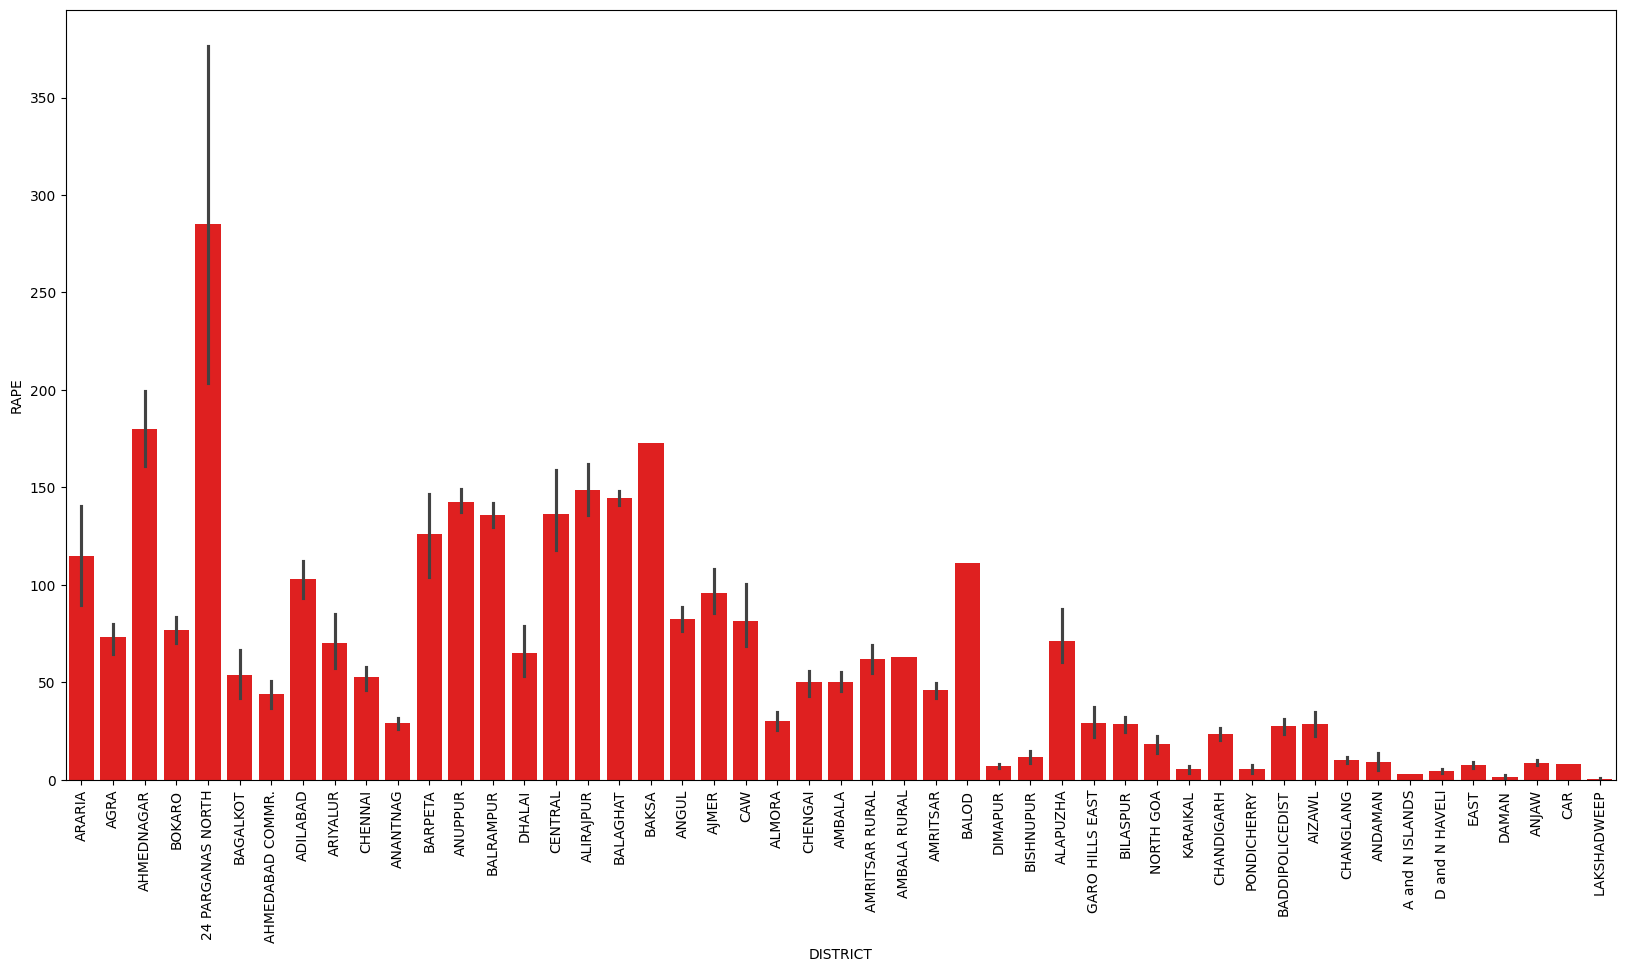

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['RAPE'],color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# from the above visualization we conclude that district 24 PARGANAS NORTH has highest number of Rape in this distrct

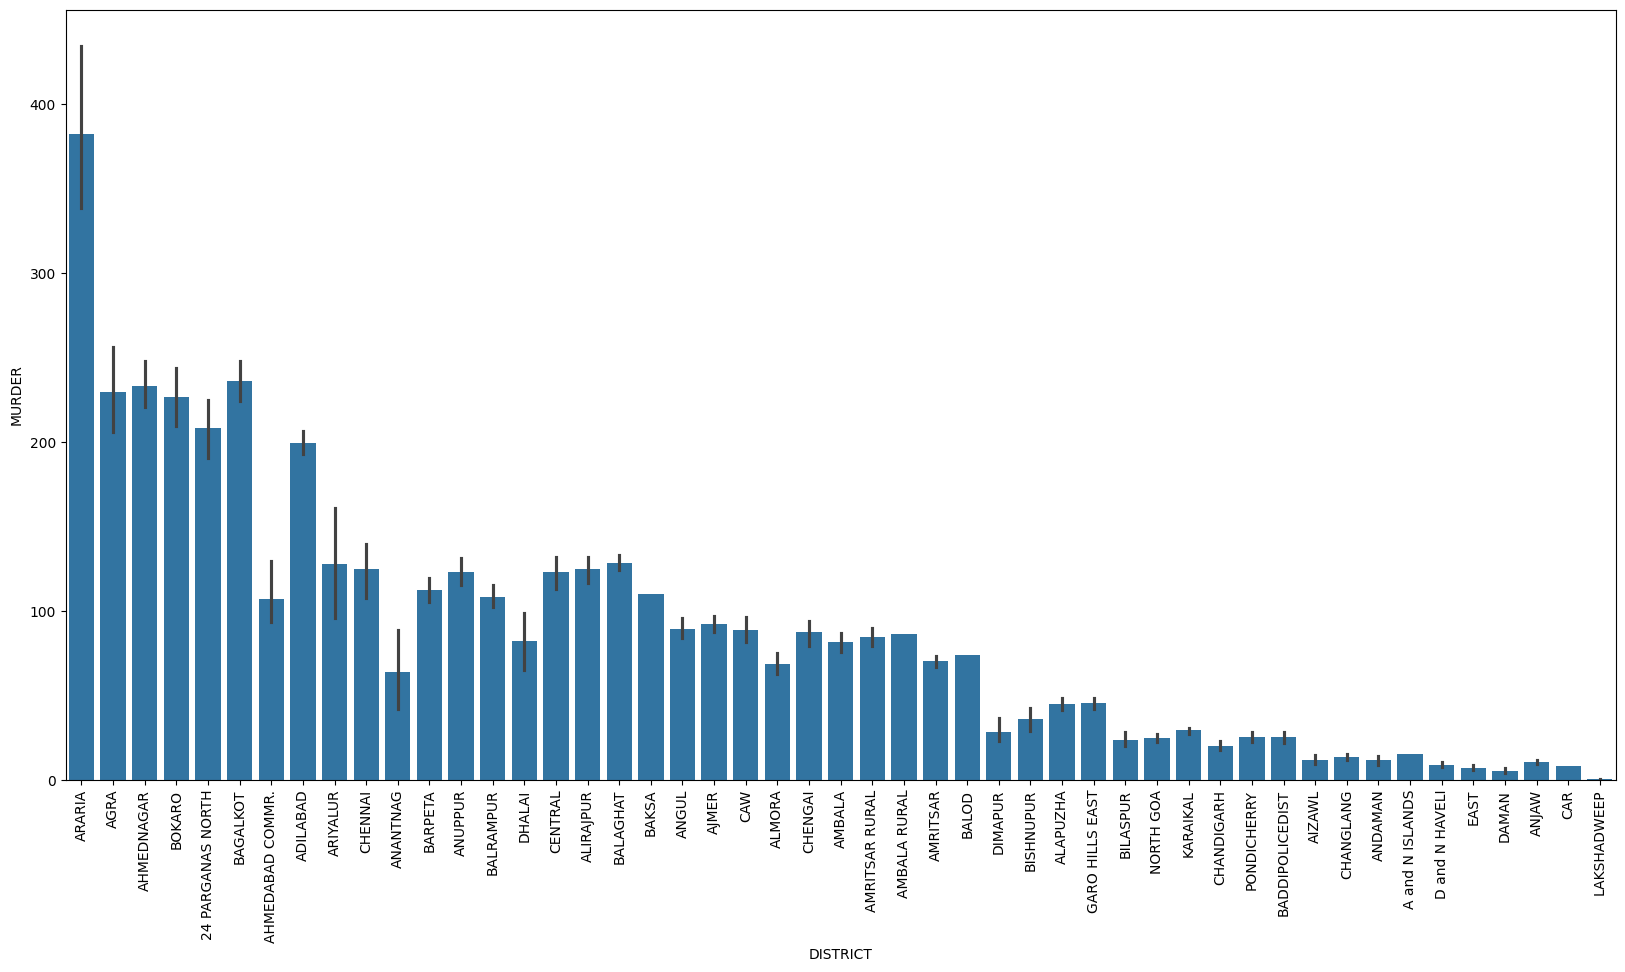

In [109]:
plt.figure(figsize=(20,10))
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['MURDER'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#  from the above visualization we observed that ARARRIA DISTRICT of bihar has highest number of murders 